In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Define the NeuralNet class
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Set up 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Early stopping parameters
patience = 10  # Stop if no improvement after 10 epochs
best_val_loss = float('inf')
stopping_counter = 0

# Track losses
train_losses = []
val_losses = []

for train_index, test_index in kf.split(X_scaled_selected, y):
    X_train, X_test = X_scaled_selected[train_index], X_scaled_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Handle class imbalance with SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=1)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
    
    # Create datasets and dataloaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Initialize model
    num_classes = len(np.unique(y_train))
    input_size = X_train.shape[1]
    model = NeuralNet(input_size, num_classes)
    
    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    # Train with early stopping
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
        
        # Calculate average training loss
        avg_train_loss = epoch_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Evaluate on validation set
        model.eval()
        epoch_val_loss = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                val_loss = criterion(outputs, targets)
                epoch_val_loss += val_loss.item()
        
        avg_val_loss = epoch_val_loss / len(test_loader)
        val_losses.append(avg_val_loss)
        
        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            stopping_counter = 0  # Reset counter
        else:
            stopping_counter += 1
            if stopping_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Hyperparameter Optimization Progress with Early Stopping')
plt.legend()
plt.show()

NameError: name 'X_scaled_selected' is not defined

Node Input Layer_0 (Input/Output) -> Light Blue
Node Input Layer_1 (Input/Output) -> Light Blue
Node Input Layer_2 (Input/Output) -> Light Blue
Node Input Layer_3 (Input/Output) -> Light Blue
Node Input Layer_4 (Input/Output) -> Light Blue
Node Input Layer_5 (Input/Output) -> Light Blue
Node Input Layer_6 (Input/Output) -> Light Blue
Node Input Layer_7 (Input/Output) -> Light Blue
Node Input Layer_8 (Input/Output) -> Light Blue
Node Input Layer_9 (Input/Output) -> Light Blue
Node Hidden Layer 1_0 (Hidden) -> Red
Node Hidden Layer 1_1 (Hidden) -> Red
Node Hidden Layer 1_2 (Hidden) -> Red
Node Hidden Layer 1_3 (Hidden) -> Light Blue
Node Hidden Layer 1_4 (Hidden) -> Light Blue
Node Hidden Layer 1_5 (Hidden) -> Light Blue
Node Hidden Layer 1_6 (Hidden) -> Light Blue
Node Hidden Layer 1_7 (Hidden) -> Light Blue
Node Hidden Layer 1_8 (Hidden) -> Light Blue
Node Hidden Layer 1_9 (Hidden) -> Light Blue
Node Hidden Layer 2_0 (Hidden) -> Red
Node Hidden Layer 2_1 (Hidden) -> Red
Node Hidden Lay

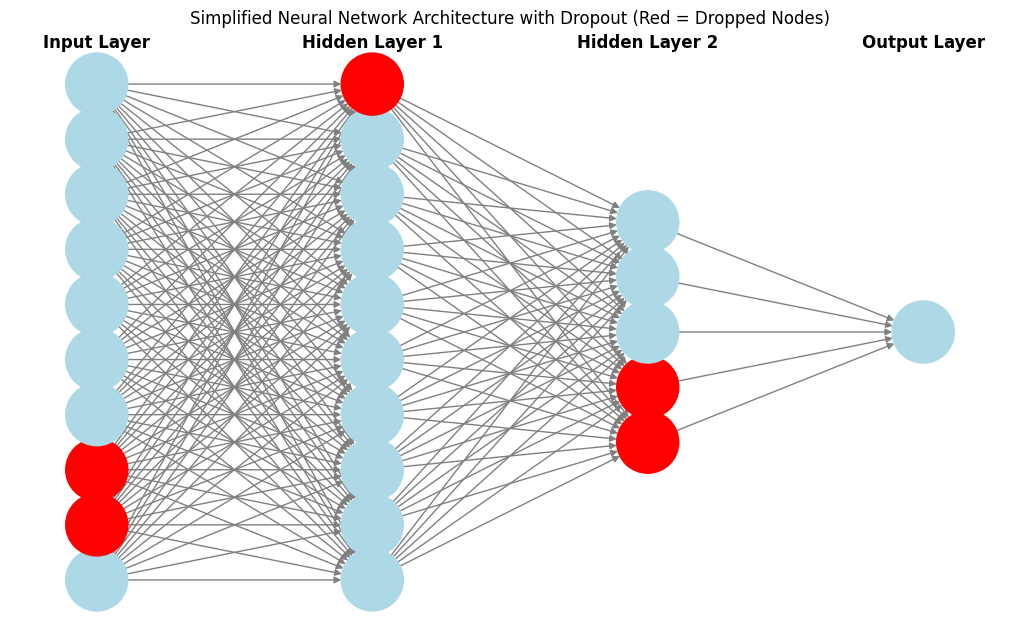

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools

def draw_nn():
    G = nx.DiGraph()

    # Define layers
    layers = {
        "Input Layer": 10,     
        "Hidden Layer 1": 10,  
        "Hidden Layer 2": 5,   
        "Output Layer": 1      
    }

    # Dropout estimation (only for hidden layers)
    dropout_nodes = {
        "Hidden Layer 1": 3,  
        "Hidden Layer 2": 2   
    }

    # Node positions, color mapping, and spacing
    pos = {}
    node_colors = []
    layer_x_spacing = 3  
    layer_y_spacing = 1.5  
    x_offset = 0

    for layer, num_nodes in layers.items():
        # Dropout is applied **only to hidden layers**
        dropout_indices = set()
        if layer in dropout_nodes:  
            dropout_count = dropout_nodes[layer]
            dropout_indices = set(range(dropout_count))  

        y_start = -((num_nodes - 1) * layer_y_spacing) / 2  
        for i in range(num_nodes):
            node_name = f"{layer}_{i}"
            pos[node_name] = (x_offset, y_start + i * layer_y_spacing)
            
            # **Force Input and Output Layers to Only Have Light Blue Nodes**
            if layer == "Input Layer" or layer == "Output Layer":
                node_colors.append("lightblue")  
                print(f"Node {node_name} (Input/Output) -> Light Blue")  # Debugging print
            else:
                node_colors.append("red" if i in dropout_indices else "lightblue")
                print(f"Node {node_name} (Hidden) -> {'Red' if i in dropout_indices else 'Light Blue'}")  # Debugging print
        
        x_offset += layer_x_spacing  

    # Add edges
    node_layers = list(layers.keys())
    for i in range(len(node_layers) - 1):
        layer1_nodes = [n for n in pos.keys() if node_layers[i] in n]
        layer2_nodes = [n for n in pos.keys() if node_layers[i + 1] in n]
        for node1, node2 in itertools.product(layer1_nodes, layer2_nodes):
            G.add_edge(node1, node2)

    # Draw the network
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=False, node_size=2000, node_color=node_colors, edge_color="gray", font_size=10, arrows=True)
    
    # Add layer labels
    for layer, x in zip(layers.keys(), range(0, x_offset, layer_x_spacing)):
        plt.text(x, max(pos.values(), key=lambda p: p[1])[1] + 1, layer, fontsize=12, ha="center", fontweight="bold")

    plt.title("Simplified Neural Network Architecture with Dropout (Red = Dropped Nodes)")
    plt.show()

draw_nn()
